In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def showImg(img, title = ''):
    plt.figure(figsize = (20,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

def showGrayScaleImg(img, title = ''):
    plt.figure(figsize = (20,15));
    plt.title(title)
    plt.imshow(img, cmap='gray')

all_contours = -1
green = (0,255,0)
thickness = 2

new_img = cv2.UMat(cv2.IMREAD_COLOR)


## Object Detection

### Template Matching

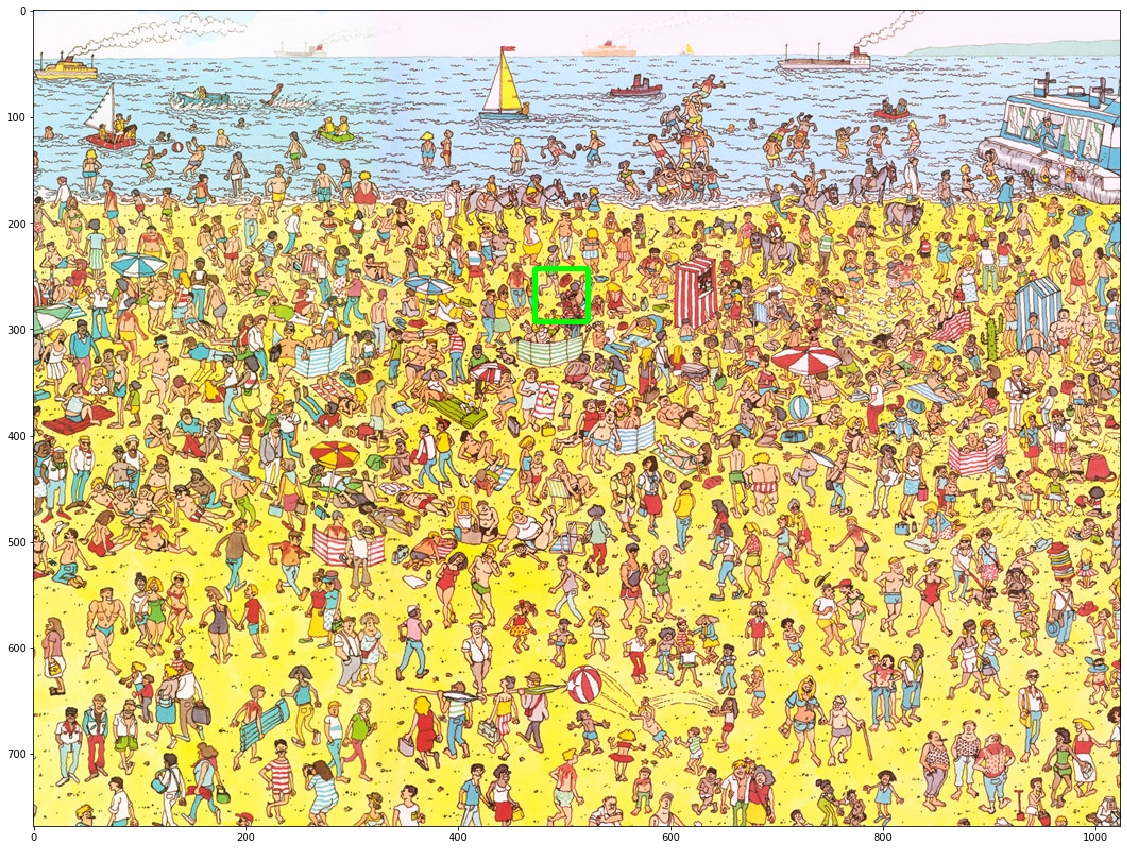

In [6]:
image = cv2.imread('img/WandoScene.jpg')
#image = cv2.imread('img/WaldoScene1.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('img/waldo.jpg',0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,255,0), 3)
showImg(image)

### Corners

In [ ]:
image = cv2.imread('img/chess.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 1)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

showImg(image)

In [ ]:
img = cv2.imread('img/chess.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 49, 0.1, 50)
#corners = cv2.goodFeaturesToTrack(gray, 60, 0.01, 50)


for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-5,y-5),(x+5,y+5),(0,255,0), -1)
    
showImg(img)

### SIFT

In [ ]:
image = cv2.imread('img/1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Create SIFT Feature Detector object
#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()


#Detect key points
keypoints = sift.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich key points on input image
image = cv2.drawKeypoints(image, keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - SIFT', image)

## SURF

In [ ]:
image = cv2.imread('img/1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Create SURF Feature Detector object
#surf = cv2.SURF(400)
surf = cv2.xfeatures2d.SURF_create()


# Only features, whose hessian is larger than hessianThreshold are retained by the detector
surf.hessianThreshold = 500
keypoints, descriptors = surf.detectAndCompute(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich key points on input image
image = cv2.drawKeypoints(image, keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


## FAST

In [ ]:
image = cv2.imread('img/1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create FAST Detector object
fast = cv2.FastFeatureDetector_create(40)

# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints = fast.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image, keypoints, new_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - FAST', image)
cv2.waitKey()
cv2.destroyAllWindows()
#showImg(image)

In [14]:
image = cv2.imread('img/2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create FAST Detector object
fast = cv2.FastFeatureDetector_create(40)

# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints = fast.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image, keypoints, new_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - FAST', image)
cv2.waitKey()
cv2.destroyAllWindows()
#showImg(image)

Number of keypoints Detected:  5191


## ORB

Number of keypoints Detected:  500


TypeError: Image data of dtype object cannot be converted to float

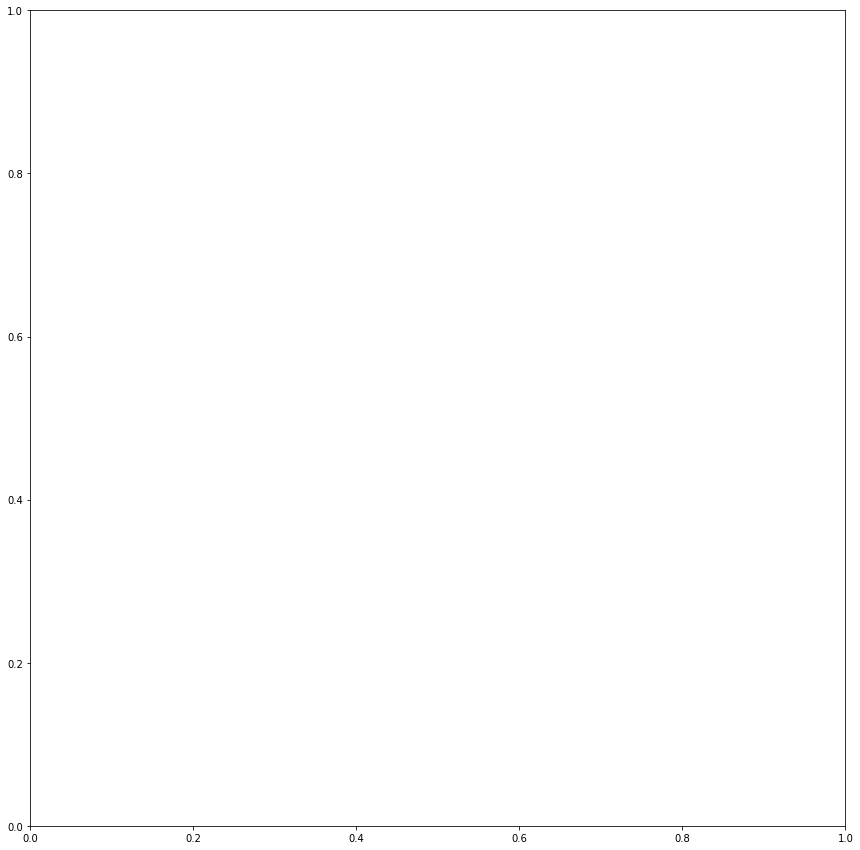

In [3]:
image = cv2.imread('img/wendy.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create ORB object, we can specify the number of key points we desire
orb = cv2.ORB_create()

# Determine key points
keypoints = orb.detect(gray, None)

# Obtain the descriptors
keypoints, descriptors = orb.compute(gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
new_img = cv2.UMat(cv2.IMREAD_COLOR)

image = cv2.drawKeypoints(image, keypoints,new_img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


showImg(image)   
#cv2.imshow('Feature Method - ORB', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread('img/2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create ORB object, we can specify the number of key points we desire
orb = cv2.ORB_create()

# Determine key points
keypoints = orb.detect(gray, None)

# Obtain the descriptors
keypoints, descriptors = orb.compute(gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
new_img = cv2.UMat(cv2.IMREAD_COLOR)

image = cv2.drawKeypoints(image, keypoints,new_img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    
cv2.imshow('Feature Method - ORB', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
def ORB_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of ORB matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    
    #showImg(image1)
    
    # Create ORB detector with 1000 keypoints with a scaling pyramid factor of 1.2
    orb = cv2.ORB_create(1000, 1.2)
    
    # Detect keypoints of original image
    (kp1, des1) = orb.detectAndCompute(image1, None)

    # Detect keypoints of rotated image
    (kp2, des2) = orb.detectAndCompute(image_template, None)

    # Create matcher     
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Do matching
    matches = bf.match(des1,des2)

    # Sort the matches based on distance.  Least distance
    # is better
    matches = sorted(matches, key=lambda val: val.distance)
    
    if len(matches) > 210:
        matches_img = cv2.drawMatches(image1,kp1,image_template,kp2,matches[:20],None)
        cv2.imwrite('orbMatches.jpg',matches_img)

    return matches

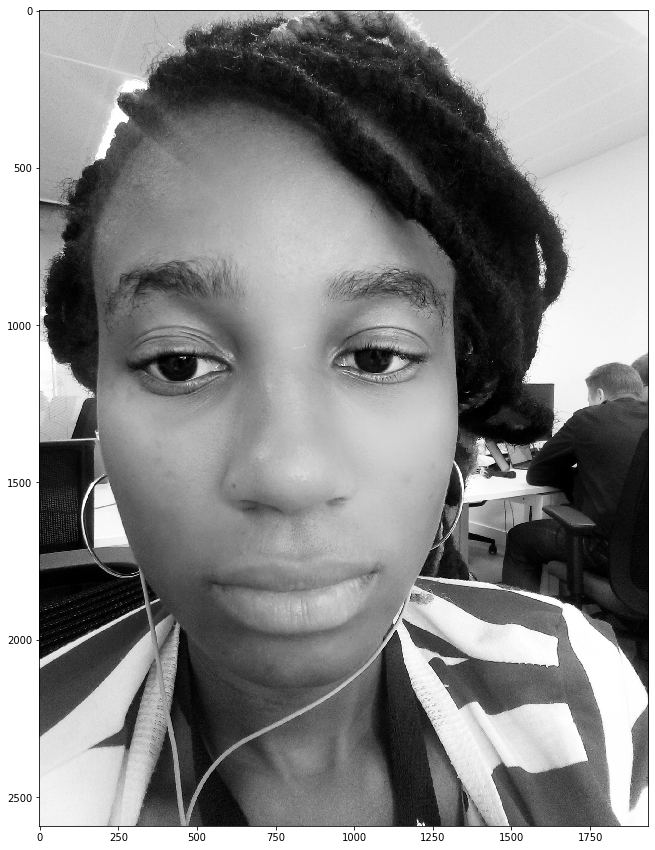

In [11]:
image_template = cv2.imread('img/wendy2.jpg', 0) 
showGrayScaleImg(image_template)

In [13]:
cap = cv2.VideoCapture(0)

# Load our image template, this is our reference image
image_template = cv2.imread('img/wendy2.jpg', 0) 

while True:

    # Get webcam images
    ret, frame = cap.read()
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
    top_left_x = width // 3
    top_left_y = (height // 2) + (height // 4)
    bottom_right_x = (width // 3) * 2
    bottom_right_y = (height // 2) - (height // 4)
    
    # Draw rectangular window for our region of interest
    cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
    #cv2.rectangle(img_copy,(240,220),(550,510),(0,255,0),2);
    
    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)
    
    # Get number of ORB matches 
    matches = ORB_detector(cropped, image_template)
    
    # Display status string showing the current no. of matches 
    output_string = "Matches = " + str(len(matches))
    cv2.putText(frame, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)
    
    # Our threshold to indicate object detection
    # For new images or lightening conditions you may need to experiment a bit     
    threshold = 400
    
    # If matches exceed our threshold then object has been detected
    if len(matches) > threshold:
        cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
        cv2.putText(frame,'Object Found',(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2)        
    
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

## HAAR Cascades

In [4]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('img/people1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    
cv2.waitKey(0)    
cv2.destroyAllWindows()

In [5]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

# Mini Projects

## Level 1

### Students detector

1. Create an object detector capable of identifying at least 2 of your class mates (the more the better) in an image

### Cars detector

1. Create a classifier to detect cars in an image
1. If at least one car was detected write Car Detected (in Green) on top of the image, otherwise write No car detected (in Red)
1. Save the image to disk
1. Show the image result inside the notebook

## Level 2

### Students detector

1. Now make it work live with a webcam, if a person is detected write the name of the person on top of the image
1. Save the image to disk

### Cars detector

1. Make it work with a video0
1. Put a bounding box around the cars detected


## Level 3

### Students detector

1. Show on screen how many persons are currently in the room
1. List the name of the persons in the room  
1. If a person was detected but does not match with any student add a person to the room and to the list as 'Unknown Person'

### Cars detector

1. Get a higher resolution video and extract the car plates and save them to disk

## Level 4

### Students detector

1. When a person leaves decrease the number of persons in the room
1. When a person arrives increase the number of persons in the room
1. Update the list of names as the persons arrive and leave